In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import f_regression,SelectKBest
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_confusion_matrix

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
# metrics untuk melakukan evaluasi model

In [2]:
df = pd.read_csv('Churn_Predictions.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
len(df)

10000

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
                      df[col].nunique(), list(df[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'type_data', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [7]:
dfDesc

,feature,type_data,null,nulPct,unique,uniqueSample
0,RowNumber,int64,0,0.0,10000,"[4086, 6969, 2475, 9718, 4820]"
1,CustomerId,int64,0,0.0,10000,"[15710087, 15569120, 15588854, 15713370, 15652..."
2,Surname,object,0,0.0,2932,"[Macleod, Mitchell, Crist, Ch'en, Gearheart]"
3,CreditScore,int64,0,0.0,460,"[828, 554, 603, 479, 545]"
4,Geography,object,0,0.0,3,"[Spain, Germany, France]"
5,Gender,object,0,0.0,2,"[Male, Female]"
6,Age,int64,0,0.0,70,"[39, 29, 56, 31, 33]"
7,Tenure,int64,0,0.0,11,"[2, 9, 7, 4]"
8,Balance,float64,0,0.0,6382,"[152806.74, 160602.25, 102585.88, 142663.46, 7..."
9,NumOfProducts,int64,0,0.0,4,"[1, 2]"


## Pemilihan Feature

Setelah melakukan analisis data eksplorasi, langkah selanjutnya adalah melakukan seleksi fitur dengan menganalisis korelasi antara semua fitur dan fitur target.

### Feature Y (Variabel Dependen)
Variabel Dependen yang salah pilih adalah Exited. Dimana Variabel ini menunjukan bahwa customer keluar atau tidak dari bank tersebut.

In [8]:
df['Exited'].value_counts()*100/len(df)

0    79.63
1    20.37
Name: Exited, dtype: float64

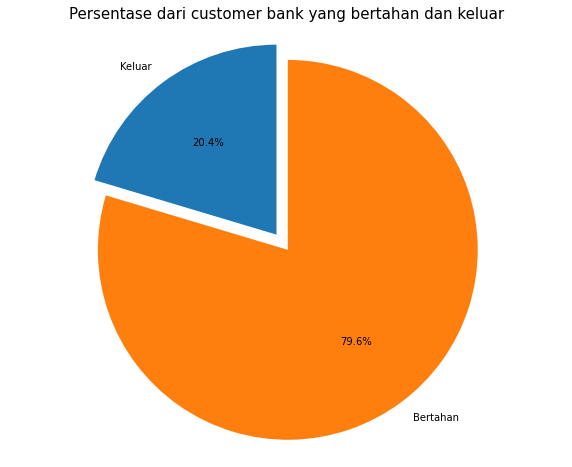

In [113]:
labels = 'Keluar', 'Bertahan'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')
plt.title("Persentase dari customer bank yang bertahan dan keluar", size = 15)
plt.savefig('satu')
plt.show()

### Feature X

Dari DataFrame tersebut dapat disimpulkan bahwa terdapat tujuh kolom yang memberikan informasi personal:

- `RowNumber` sebagai nomor record (baris) 
- `CustomerId` sebagai nomor id mengandung nilai acak dan tidak berpengaruh.
- `Surname` sebagai nama belakang pelanggan.
- `CreditScore` sebagai skor kredit.
- `Geography` sebagai lokasi customer dimana ia tinggal.
- `Gender` sebagai Jenis kelamin antara laki laki atau perempuan.
- `Age` sebagai kolom yang menunjukan umur dari customer.
- `Tenure` sebagai kolom yang menunjukan sudah berapa lama menjadi customer.
- `Balance` sebagai kolom yang menunjukan customer memiliki tabungan berapa di bank tersebut.
- `NumOfProducts` sebagai kolom yang menunjukan berapa product yang di gunakan customer.
- `HasCrCard` sebagai kolom yang menunjukan apakah customer tersebut memiliki credit card bank tersebut.
- `IsActiveMember` sebagai kolom yang menunjukan apakah customer tersebut merupakan customer aktiv atau tidak.
- `EstimatedSalary` sebagai kolom yang menunjukan perkiraan gaji dari customer tersebut.

In [10]:
def outliers(DataFrame,Series):
    iqr = Series.quantile(.75) - Series.quantile(.25)
    lower_bound = Series.quantile(.25) - (1.5*iqr)
    upper_bound = Series.quantile(.75) + (1.5*iqr)
    return DataFrame[(Series >= upper_bound) | (Series <= lower_bound)]

In [11]:
outliers(df,df['Age'])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9765,9766,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9879,9880,15669414,Pisano,486,Germany,Male,62,9,118356.89,2,1,0,168034.83,1
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [12]:
# presentase outliers dari dataframe kolom Age
print(f'Persentase outliers: {round(len(outliers(df,df.Age))/len(df.Age)*100,2)}%')

Persentase outliers: 4.11%


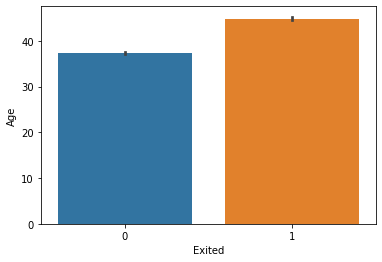

In [13]:
sns.barplot(x=df.Exited, y=df['Age'])

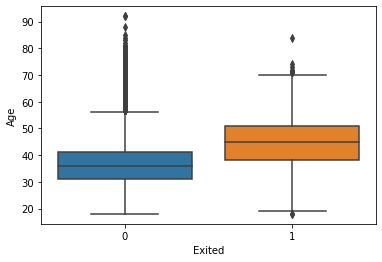

In [14]:
sns.boxplot(x=df.Exited, y=df['Age'])

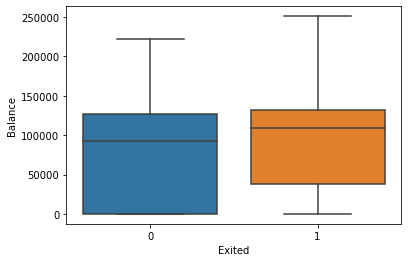

In [15]:
sns.boxplot(x=df.Exited, y=df['Balance'])

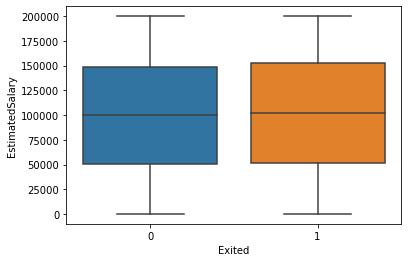

In [16]:
sns.boxplot(x=df.Exited, y=df['EstimatedSalary'])

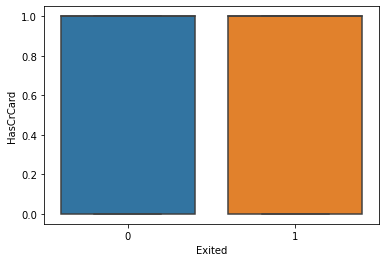

In [17]:
sns.boxplot(x=df.Exited, y=df['HasCrCard'])

## 2. Cleaning

### Null dan Nan

In [18]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [19]:
# mendrop feature feature yang tidak di gunakan
data = df.drop(['RowNumber','CustomerId' ,'Surname'],axis=1)

In [20]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Insight and Visualization

### ***kolom Geography***

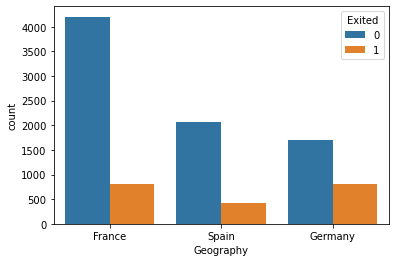

In [125]:
sns.countplot(x='Geography', hue='Exited',data= df)
plt.savefig('dua')
plt.show()

In [22]:
by_geo = df.groupby('Geography')
by_geo['Exited'].value_counts(normalize=True)

Geography  Exited
France     0         0.838452
           1         0.161548
Germany    0         0.675568
           1         0.324432
Spain      0         0.833266
           1         0.166734
Name: Exited, dtype: float64

Dari hasil visualisasi data di atas kemungkinan orang `German` lebih banyak keluar dari bank tersebut di bandingkan dengan orang ***Prancis*** dan orang ***Spanyol***

## Kolom CreditScore

In [23]:
df[['CreditScore']].nunique()

CreditScore    460
dtype: int64

In [24]:
round(df[['CreditScore']].mean(),2)

CreditScore    650.53
dtype: float64

In [25]:
by_credit = df.groupby('Exited')
by_credit['CreditScore'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

In [26]:
df[(df['Exited'] == 1) & (df['CreditScore'] < 646)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
22,23,15699309,Gerasimov,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,9948,15732202,Abramovich,615,France,Male,34,1,83503.11,2,1,1,73124.53,1
9956,9957,15707861,Nucci,520,France,Female,46,10,85216.61,1,1,0,117369.52,1
9975,9976,15666295,Smith,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1


In [27]:
df[(df['Exited'] == 0) & (df['CreditScore'] >= 646)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
19,20,15568982,Hao,726,France,Female,24,6,0.00,2,1,1,54724.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0


Dari data di atas dapat dilihat bahwa ada ***460*** angka unique dalam `CreditScore`, yang memiliki rata rata sebesar ***650,53***.
Dan rata rata yang exit dan tidak exit memiliki rata rata CreditScore yang hampir sama dengan selisih kurang lebih ***6*** `CreditScore`.
Namun apabila di telaah lebih dalam. yang memiliki `creditscore` di bawah ***646*** dan `exit` hanya ***1000*** orang. Dibanding dengan orang yang bertahan dan memiliki `creditscore` lebih dari ***646*** dan `tidak exit` sebanyak ***4000*** orang

## Kolom Gender

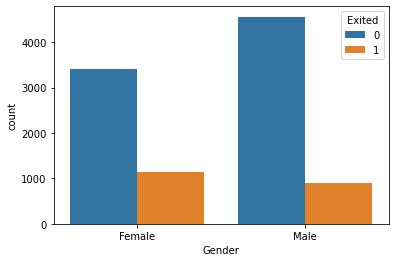

In [115]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.savefig('tiga')

In [29]:
by_gender = df.groupby('Gender')
by_gender['Exited'].value_counts(normalize=True)

Gender  Exited
Female  0         0.749285
        1         0.250715
Male    0         0.835441
        1         0.164559
Name: Exited, dtype: float64

In [30]:
df[(df['Exited'] == 1) & (df['Gender'] == 'Male')]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
53,54,15702298,Parkhill,655,Germany,Male,41,8,125561.97,1,0,0,164040.94,1
54,55,15569590,Yoo,601,Germany,Male,42,1,98495.72,1,1,0,40014.76,1
70,71,15703793,Konovalova,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,9948,15732202,Abramovich,615,France,Male,34,1,83503.11,2,1,1,73124.53,1
9962,9963,15594612,Flynn,702,Spain,Male,44,9,0.00,1,0,0,59207.41,1
9975,9976,15666295,Smith,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1


In [31]:
df[(df['Exited'] == 0) & (df['Gender'] == 'Male')]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0


In [32]:
df[(df['Exited'] == 1) & (df['Gender'] == 'Female')]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
22,23,15699309,Gerasimov,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
30,31,15589475,Azikiwe,591,Spain,Female,39,3,0.00,3,1,0,140469.38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9956,9957,15707861,Nucci,520,France,Female,46,10,85216.61,1,1,0,117369.52,1
9960,9961,15681026,Lucciano,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [33]:
df[(df['Exited'] == 0) & (df['Gender'] == 'Female')]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
13,14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,9977,15656062,Azikiwe,637,France,Female,33,7,103377.81,1,1,0,84419.78,0
9977,9978,15579969,Mancini,683,France,Female,32,9,0.00,2,1,1,24991.92,0
9979,9980,15692664,Diribe,677,France,Female,58,1,90022.85,1,0,1,2988.28,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0


In [34]:
a = len(df[(df['Exited'] == 0) & (df['Gender'] == 'Male')]) / len(df[(df['Exited'] == 1) & (df['Gender'] == 'Male')]) *100
print(round(a,2))

507.68


In [35]:
b = len(df[(df['Exited'] == 0) & (df['Gender'] == 'Female')]) / len(df[(df['Exited'] == 1) & (df['Gender'] == 'Female')]) *100
print(round(b,2))

298.86


In [36]:
round(a/b*100,2)

169.87

Dari hasil visualisasi data di atas lebih banyak yang keluar dari bank tersebut adalah gender ***Female*** daripada gender **male**.Dengan persentase sebanyak `169%` lebih banyak di banding **female**

## Kolom Age

In [38]:
print(f'Persentase outliers: {round(len(outliers(df,df.Age))/len(df.Age)*100,2)}%')

Persentase outliers: 4.11%


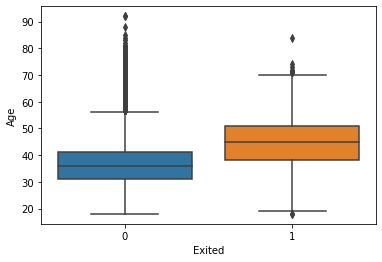

In [39]:
sns.boxplot(df['Exited'], df['Age'])
plt.show()

In [129]:
a = df['Age'].max()
b = df['Age'].min()
a/b

5.111111111111111

In [130]:
age_bin = pd.cut(df['Age'],5)
age_bin

0         (32.8, 47.6]
1         (32.8, 47.6]
2         (32.8, 47.6]
3         (32.8, 47.6]
4         (32.8, 47.6]
             ...      
9995      (32.8, 47.6]
9996      (32.8, 47.6]
9997      (32.8, 47.6]
9998      (32.8, 47.6]
9999    (17.926, 32.8]
Name: Age, Length: 10000, dtype: category
Categories (5, interval[float64]): [(17.926, 32.8] < (32.8, 47.6] < (47.6, 62.4] < (62.4, 77.2] < (77.2, 92.0]]

In [131]:
df['age_bin'] = age_bin

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

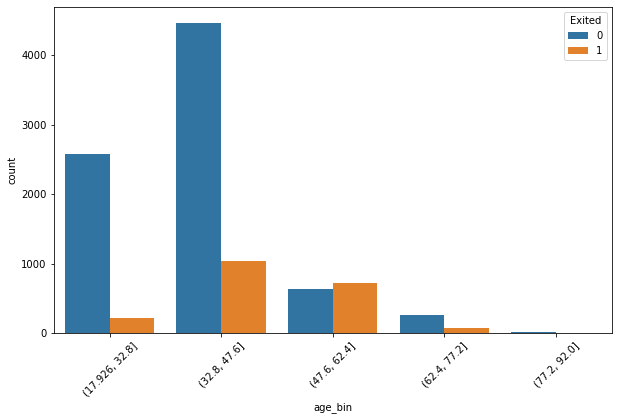

In [132]:
plt.figure(figsize=(10,6))
sns.countplot(x='age_bin', hue='Exited', data=df)
plt.xticks(rotation=45)

In [133]:
by_age = df.groupby('age_bin')
by_age.Exited.value_counts(normalize=True)

age_bin         Exited
(17.926, 32.8]  0         0.923656
                1         0.076344
(32.8, 47.6]    0         0.811818
                1         0.188182
(47.6, 62.4]    1         0.529978
                0         0.470022
(62.4, 77.2]    0         0.785075
                1         0.214925
(77.2, 92.0]    0         0.958333
                1         0.041667
Name: Exited, dtype: float64

Dari data di atas bisa dilihat bahwa persebaran data dari kolom **Age** bahwa persentase orang terbanyak paling besar meniggalkan bank atau `Exited` dari umur `47 - 62`, sedangkan yang paling banyak bertahan yaitu di umur `77-92` lalu diikuti dengan umur `17 - 32`

## Kolom Tenure

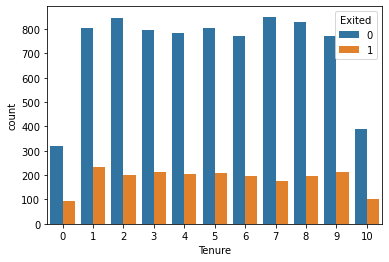

In [47]:
sns.countplot(df['Tenure'], hue=df['Exited'])

In [48]:
by_Tenure = df.groupby('Tenure')
by_Tenure['Exited'].value_counts(normalize=True)

Tenure  Exited
0       0         0.769976
        1         0.230024
1       0         0.775845
        1         0.224155
2       0         0.808206
        1         0.191794
3       0         0.788900
        1         0.211100
4       0         0.794742
        1         0.205258
5       0         0.793478
        1         0.206522
6       0         0.797311
        1         0.202689
7       0         0.827821
        1         0.172179
8       0         0.807805
        1         0.192195
9       0         0.783537
        1         0.216463
10      0         0.793878
        1         0.206122
Name: Exited, dtype: float64

Dari data di atas bahwa lamanya atau barunya nasabah menjadi customer bank tersebut.
Tidak dapat di tentukan akan keluar atau tidak dari bank tersebut, dikarenakan persentase setiap lamanya nasabah menjadi customer bank tersebut memiliki nilai yang mirip

## Kolom Balance

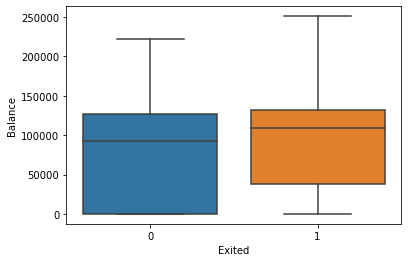

In [49]:
sns.boxplot(df['Exited'], df['Balance'])
plt.show()

In [50]:
bal_bin = pd.cut(df['Balance'],5)
bal_bin

0          (-250.898, 50179.618]
1        (50179.618, 100359.236]
2       (150538.854, 200718.472]
3          (-250.898, 50179.618]
4       (100359.236, 150538.854]
                  ...           
9995       (-250.898, 50179.618]
9996     (50179.618, 100359.236]
9997       (-250.898, 50179.618]
9998     (50179.618, 100359.236]
9999    (100359.236, 150538.854]
Name: Balance, Length: 10000, dtype: category
Categories (5, interval[float64]): [(-250.898, 50179.618] < (50179.618, 100359.236] < (100359.236, 150538.854] < (150538.854, 200718.472] < (200718.472, 250898.09]]

In [51]:
df['bal_bin'] = bal_bin

In [52]:
df['bal_bin']

0          (-250.898, 50179.618]
1        (50179.618, 100359.236]
2       (150538.854, 200718.472]
3          (-250.898, 50179.618]
4       (100359.236, 150538.854]
                  ...           
9995       (-250.898, 50179.618]
9996     (50179.618, 100359.236]
9997       (-250.898, 50179.618]
9998     (50179.618, 100359.236]
9999    (100359.236, 150538.854]
Name: bal_bin, Length: 10000, dtype: category
Categories (5, interval[float64]): [(-250.898, 50179.618] < (50179.618, 100359.236] < (100359.236, 150538.854] < (150538.854, 200718.472] < (200718.472, 250898.09]]

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

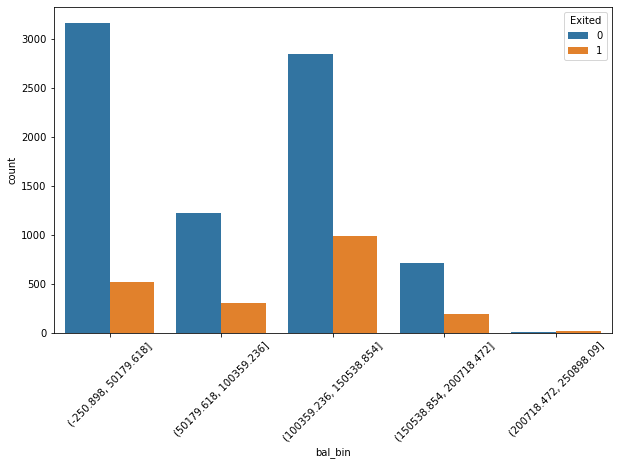

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(x='bal_bin', hue='Exited', data=df)
plt.xticks(rotation=45)

In [54]:
by_bal = df.groupby('bal_bin')
by_bal.Exited.value_counts(normalize=True)

bal_bin                   Exited
(-250.898, 50179.618]     0         0.857530
                          1         0.142470
(50179.618, 100359.236]   0         0.800391
                          1         0.199609
(100359.236, 150538.854]  0         0.742163
                          1         0.257837
(150538.854, 200718.472]  0         0.782514
                          1         0.217486
(200718.472, 250898.09]   1         0.593750
                          0         0.406250
Name: Exited, dtype: float64

Dari data di atas dapat disimpulkan bahwa orang yang keluar dari nasabah bank tersebut memiliki range ***Balance*** `(188173.568, 250898.09)` sedangkan yang bertahan terbanyak dari range ***Balance*** `(-250.898, 62724.522)`

## Kolom NumOfProducts

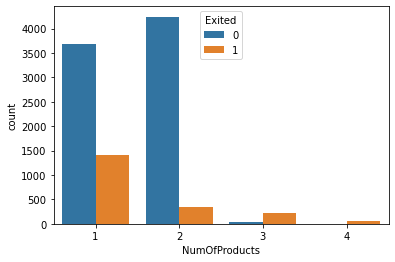

In [55]:
sns.countplot(df['NumOfProducts'], hue=df['Exited'])

In [56]:
by_prod = df.groupby('NumOfProducts')
by_prod['Exited'].value_counts(normalize=True)

NumOfProducts  Exited
1              0         0.722856
               1         0.277144
2              0         0.924183
               1         0.075817
3              1         0.827068
               0         0.172932
4              1         1.000000
Name: Exited, dtype: float64

dari data di atas terlihat bahwa orang yang memiliki **product** dari bank tersebut lebih dari 2 kemungkinan keluarnya lebih besar.

## Kolom HasCrCard

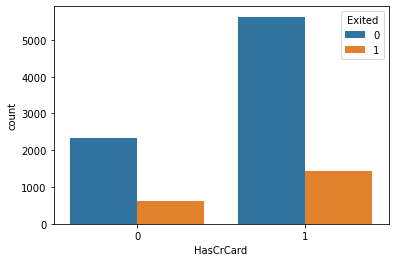

In [57]:
sns.countplot(df['HasCrCard'], hue=df['Exited'])

In [58]:
by_card = df.groupby('HasCrCard')
by_card['Exited'].value_counts(normalize=True)

HasCrCard  Exited
0          0         0.791851
           1         0.208149
1          0         0.798157
           1         0.201843
Name: Exited, dtype: float64

dari data di atas terlihat bahwa orang yang memiliki **CreditCard** dari bank tersebut kemungkinan keluarnya lebih besar.

## Kolom IsActiveMember

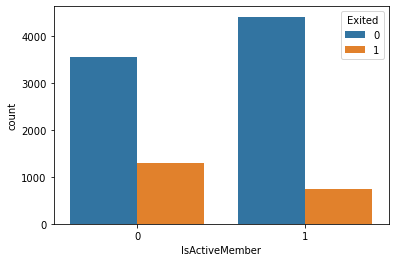

In [59]:
sns.countplot(df['IsActiveMember'], hue=df['Exited'])

In [60]:
by_member = df.groupby('IsActiveMember')
by_member['Exited'].value_counts(normalize=True)

IsActiveMember  Exited
0               0         0.731491
                1         0.268509
1               0         0.857309
                1         0.142691
Name: Exited, dtype: float64

dari visualisasi di atas dapat kita lihat bahwa ***IsActiveMember*** atau pun tidak kebanyakan tetap setia pada bank tersebut.
Namun bila di telaah lebih dalam bahwa yang bukan **isActiveMember** memiliki kemungkinan keluar lebih besar di bandingkan dengan yang **isActiveMember**

## Kolom Estimated Salary

In [61]:
a = df['EstimatedSalary'].max()
b = df['EstimatedSalary'].min()
c = a / b

In [62]:
round(a / c)

12

In [63]:
sal_bin = pd.cut(df['EstimatedSalary'],12)
sal_bin

0       (100002.03, 116667.105]
1       (100002.03, 116667.105]
2       (100002.03, 116667.105]
3        (83336.955, 100002.03]
4         (66671.88, 83336.955]
                 ...           
9995     (83336.955, 100002.03]
9996    (100002.03, 116667.105]
9997      (33341.73, 50006.805]
9998     (83336.955, 100002.03]
9999      (33341.73, 50006.805]
Name: EstimatedSalary, Length: 10000, dtype: category
Categories (12, interval[float64]): [(-188.401, 16676.655] < (16676.655, 33341.73] < (33341.73, 50006.805] < (50006.805, 66671.88] ... (133332.18, 149997.255] < (149997.255, 166662.33] < (166662.33, 183327.405] < (183327.405, 199992.48]]

In [64]:
df['sal_bin'] = sal_bin

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

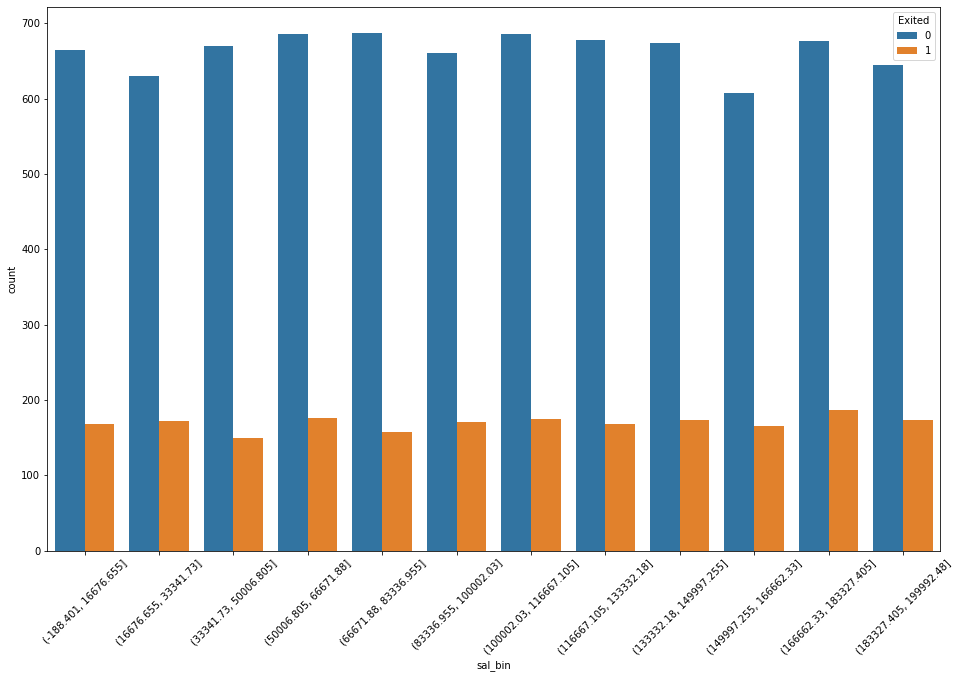

In [65]:
plt.figure(figsize=(16,10))
sns.countplot(x='sal_bin', hue='Exited', data=df)
plt.xticks(rotation=45)

In [66]:
by_salbin = df.groupby('sal_bin')
by_salbin.Exited.value_counts(normalize=True)

sal_bin                  Exited
(-188.401, 16676.655]    0         0.798077
                         1         0.201923
(16676.655, 33341.73]    0         0.785536
                         1         0.214464
(33341.73, 50006.805]    0         0.818071
                         1         0.181929
(50006.805, 66671.88]    0         0.795587
                         1         0.204413
(66671.88, 83336.955]    0         0.813981
                         1         0.186019
(83336.955, 100002.03]   0         0.794471
                         1         0.205529
(100002.03, 116667.105]  0         0.796748
                         1         0.203252
(116667.105, 133332.18]  0         0.801418
                         1         0.198582
(133332.18, 149997.255]  0         0.794811
                         1         0.205189
(149997.255, 166662.33]  0         0.785530
                         1         0.214470
(166662.33, 183327.405]  0         0.783314
                         1         0.216686


dari visualisasi di atas dapat kita lihat bahwa ***EstimatedSalary*** besar atau kecil kebanyakan tetap setia pada bank tersebut

## Pembuatan Dummy dan pengecekan Korelasi

In [67]:
df2 = df.drop(['RowNumber','CustomerId' ,'Surname'],axis=1, inplace=True)

In [68]:
df2 = pd.get_dummies(df, columns = {'Gender', 'Geography'})

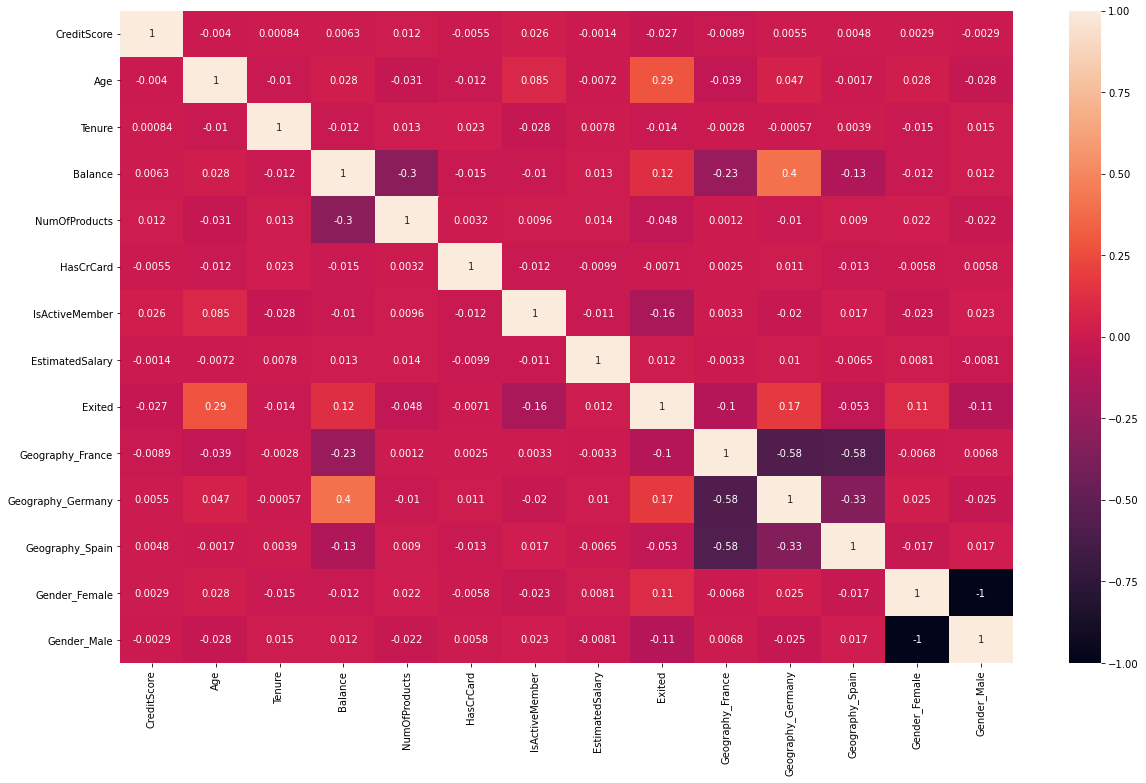

In [69]:
plt.figure(figsize= (20,12))
sns.heatmap(df2.corr(method= 'pearson'), annot= True)

In [70]:
df2.corr(method= 'pearson')['Exited'].sort_values(ascending=False)

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
Gender_Female        0.106512
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

Features that have big correlation : 
- `Age` (28.5%)
- `Germany`[Geography] (17.3%)
- `IsActiveMember` (15.6%)
- `NumofProducts` (12.5%)
- `Balance` (11.8%)
- `Male`/`Female`[Gender] (10.7%)